
# Retail Analytics - Milestones 3 & 4
# **Milestone 3**: Data Transformation & Cleaning  
# **Milestone 4**: Exploratory Data Analysis & Insights

 ## 1. Environment Setup

In [1]:
# %%
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
# Custom Modules
from data_transform import DataTransform, DataFrameTransform
from data_processing import OutlierHandler, DataSkewTransformer
from plotter import Plotter


In [ ]:


plt.style.use('seaborn-v0_8')  # Official seaborn-style in Matplotlib


import matplotlib.pyplot as plt
import seaborn as sns

# Method 1: Use Seaborn's theme
sns.set_theme(style="whitegrid", palette="pastel")


# Set other display options
pd.set_option('display.max_columns', 50)
%matplotlib inline

# %% [markdown]
# ## 2. Data Loading

# %%

In [3]:
# Load cleaned data from Milestone 2
try:
    df = pd.read_csv('customer_activity.csv')
    print("✅ Data loaded successfully")
except FileNotFoundError:
    print("❌ Error: Run Milestone 2 first!")


✅ Data loaded successfully


In [4]:
# Initial inspection
print("\nData Overview:")
display(df.head(3))
print(f"\nShape: {df.shape}")



Data Overview:


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,4.0,0.0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,26.0,876.0,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.4,0,0.0,19.0,368.0,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False



Shape: (12330, 17)


# %% [markdown]
# ## Milestone 3: Data Transformation

# %% [markdown]
# ### 3.1 Handle Missing Values

# %%

In [5]:
from data_transform import DataFrameInfo


print("Missing Values Before Cleaning:")
display(DataFrameInfo.count_nulls(df))

# Impute missing values
df_clean = DataFrameTransform.impute_missing(df.copy(), strategy='median')

print("\nMissing Values After Cleaning:")
display(DataFrameInfo.count_nulls(df_clean))


Missing Values Before Cleaning:


administrative              570
administrative_duration     912
informational                 0
informational_duration      336
product_related             579
product_related_duration    201
bounce_rates                  0
exit_rates                    0
page_values                   0
month                         0
operating_systems            11
browser                       0
region                        0
traffic_type                  0
visitor_type                  0
weekend                       0
revenue                       0
dtype: int64


Missing Values After Cleaning:


c:\Users\zakme\Documents\GitHub\exploratory-data-analysis---online-shopping-in-retail36\data_transform.py:103: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
c:\Users\zakme\Documents\GitHub\exploratory-data-analysis---online-shopping-in-retail36\data_transform.py:103: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the

administrative               0
administrative_duration      0
informational                0
informational_duration       0
product_related              0
product_related_duration     0
bounce_rates                 0
exit_rates                   0
page_values                  0
month                        0
operating_systems           11
browser                      0
region                       0
traffic_type                 0
visitor_type                 0
weekend                      0
revenue                      0
dtype: int64


### 3.2 Data Type Conversion



In [6]:
df_transformed = DataTransform.convert_columns(df_clean)
print("\nUpdated Data Types:")
display(DataFrameInfo.describe_columns(df_transformed))



Updated Data Types:


administrative               float64
administrative_duration      float64
informational                  int64
informational_duration       float64
product_related              float64
product_related_duration     float64
bounce_rates                 float64
exit_rates                   float64
page_values                  float64
month                       category
operating_systems             object
browser                       object
region                        object
traffic_type                  object
visitor_type                  object
weekend                         bool
revenue                         bool
dtype: object


### 3.3 Fix Skewness




Step 3.3: Fixing Skewness
Processing columns: ['administrative', 'administrative_duration', 'informational', 'informational_duration', 'product_related', 'product_related_duration', 'bounce_rates', 'exit_rates', 'page_values']


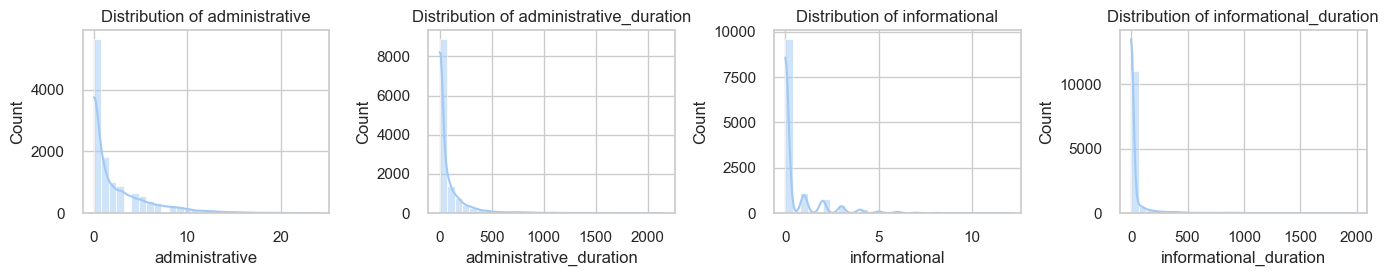

In [7]:

print("\nStep 3.3: Fixing Skewness")
numeric_cols = df_transformed.select_dtypes(include=['number']).columns.tolist()
print("Processing columns:", numeric_cols)

Plotter.plot_distributions(df_transformed, columns=numeric_cols[:4])  # Plot first 4 for example
df_skew = DataSkewTransformer.fix_skew(df_transformed, threshold=0.5)


### 3.4 Remove Outliers


In [8]:
df_final = OutlierHandler.remove_outliers(
    df_skew, 
    columns=['administrative_duration', 'product_related_duration']
)
print(f"Data reduced from {df_skew.shape[0]} to {df_final.shape[0]} rows after outlier removal")


Data reduced from 12330 to 11511 rows after outlier removal



## Milestone 4: EDA & Insights

### 4.1 Regional Revenue Analysis



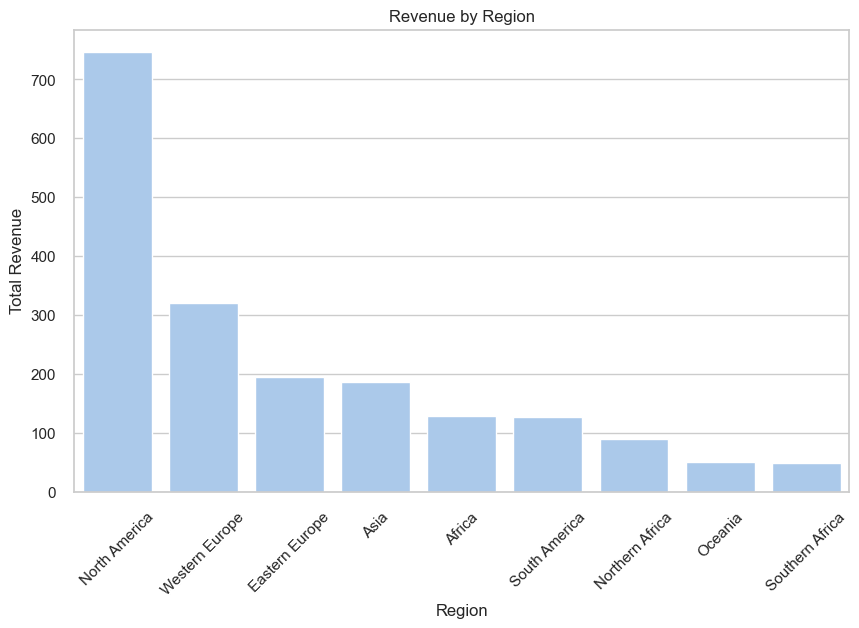


Top Performing Regions:


,sum,mean
region,,
North America,747,0.164574
Western Europe,321,0.148956
Eastern Europe,194,0.182502


In [9]:
Plotter.plot_regional_revenue(df_final)
regional_stats = df_final.groupby('region')['revenue'].agg(['sum', 'mean'])
print("\nTop Performing Regions:")
display(regional_stats.nlargest(3, 'sum'))



 ### 4.2 Customer Conversion Rates



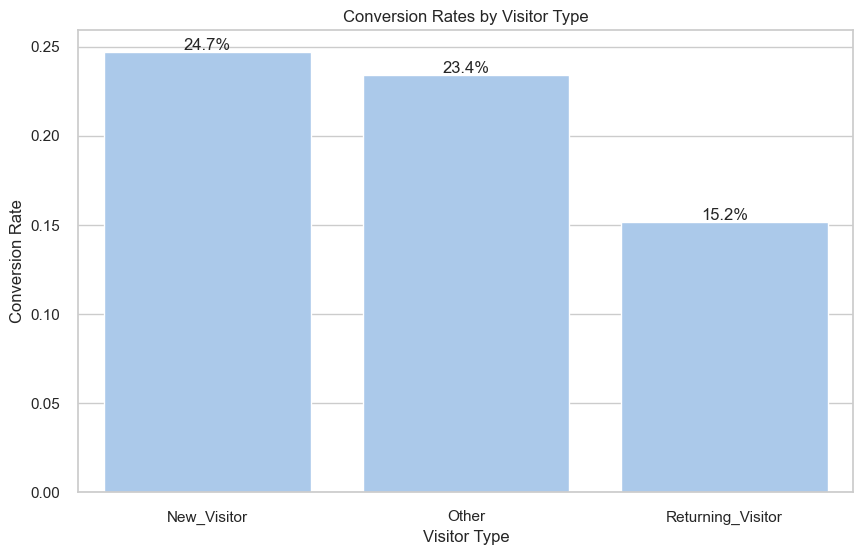


New Customer Conversion: 24.7%
Returning Customer Conversion: 15.2%
Required columns: ['administrative', 'administrative_duration', 'informational', 'informational_duration', 'product_related', 'product_related_duration', 'bounce_rates', 'exit_rates', 'page_values', 'month', 'operating_systems', 'browser', 'region', 'traffic_type', 'visitor_type', 'weekend', 'revenue']


In [10]:
Plotter.plot_visitor_conversion(df_final)
conversion_rates = df_final.groupby('visitor_type')['revenue'].mean()
print(f"\nNew Customer Conversion: {conversion_rates['New_Visitor']:.1%}")
print(f"Returning Customer Conversion: {conversion_rates['Returning_Visitor']:.1%}")
##test to see output
print("Required columns:", df_final.columns.tolist())



### 4.3 Weekend vs Weekday Performance


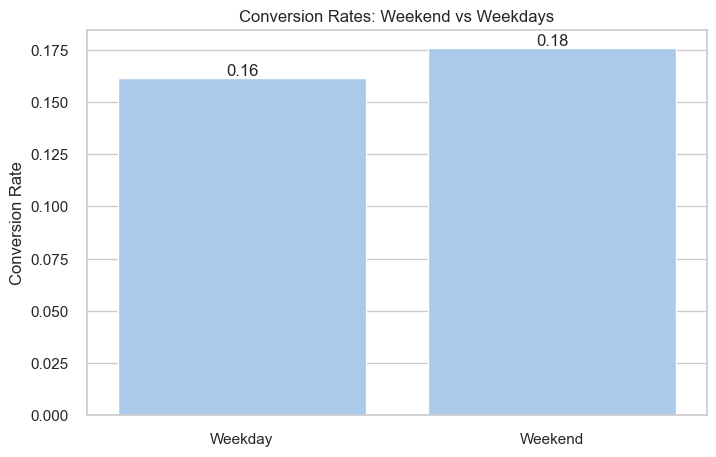


Statistical Significance (p-value): nan


In [11]:
# %%
Plotter.plot_weekend_comparison(df_final)
weekend_p_value = stats.ttest_ind(
    df_final[df_final['weekend']]['revenue'],
    df_final[~df_final['weekend']]['revenue']
).pvalue
print(f"\nStatistical Significance (p-value): {weekend_p_value:.4f}")

 ### 4.4 Monthly Sales Trends



c:\Users\zakme\Documents\GitHub\exploratory-data-analysis---online-shopping-in-retail36\plotter.py:186: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby('month')['revenue'].sum()


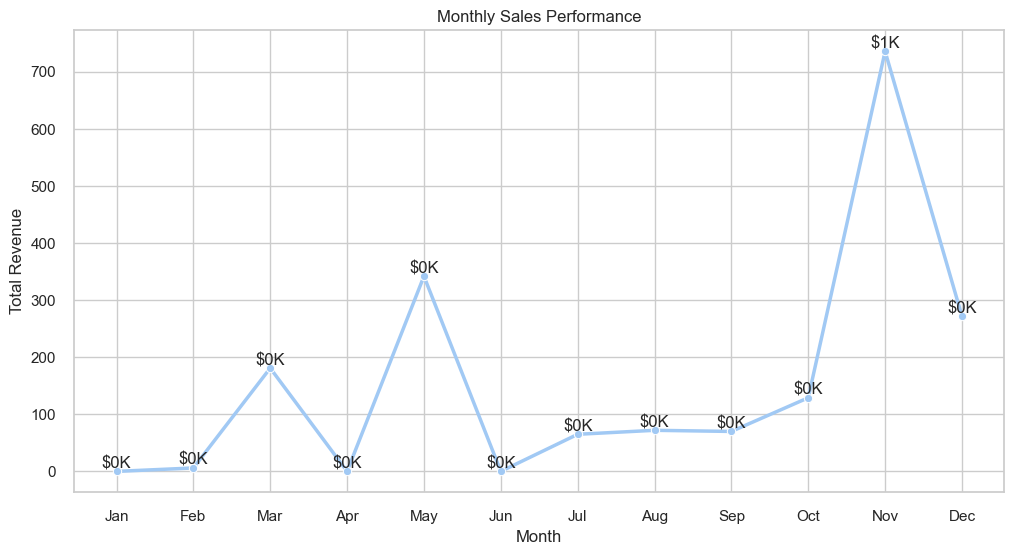


Peak Month: Nov ($1K)
Lowest Month: Jan ($0K)


C:\Users\zakme\AppData\Local\Temp\ipykernel_12856\2055174170.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue = df_final.groupby('month')['revenue'].sum()


In [12]:
Plotter.plot_monthly_sales(df_final)
monthly_revenue = df_final.groupby('month')['revenue'].sum()
print(f"\nPeak Month: {monthly_revenue.idxmax()} (${monthly_revenue.max()/1000:.0f}K)")
print(f"Lowest Month: {monthly_revenue.idxmin()} (${monthly_revenue.min()/1000:.0f}K)")


### 4.5 Traffic Source Analysis



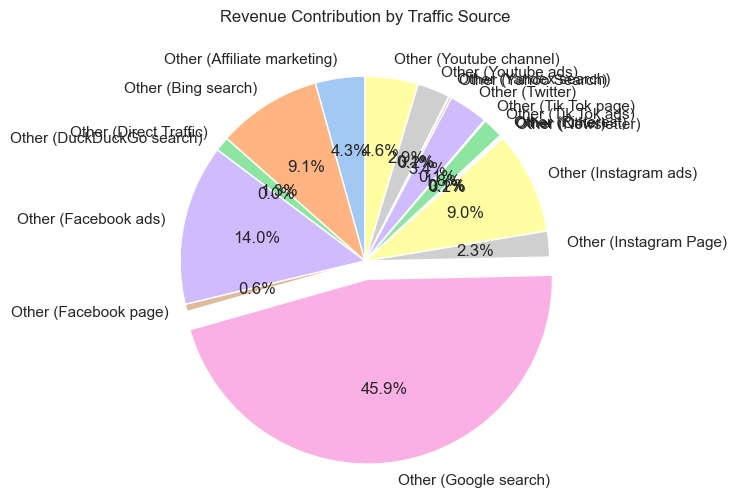


Traffic Source ROI:


,sum,count,roi
traffic_type,,,
Facebook page,12,28,0.428571
Other,2,6,0.333333
Tik Tok ads,34,122,0.278689


In [13]:
traffic_mapping = {
    1: 'Direct',
    2: 'Social',
    3: 'Ads',
    4: 'Organic',
    5: 'Referral'
}
Plotter.plot_traffic_contribution(df_final, traffic_mapping)
traffic_stats = df_final.groupby('traffic_type')['revenue'].agg(['sum', 'count'])
traffic_stats['roi'] = traffic_stats['sum'] / traffic_stats['count']
print("\nTraffic Source ROI:")
display(traffic_stats.nlargest(3, 'roi'))

In [14]:
# %% [code]
# Save final processed data
df_final.to_csv('milestone34_processed.csv', index=False)